In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [8]:
df = pd.read_csv('bank_churn_model.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [9]:
df2 = df.drop(['RowNumber','CustomerId','Surname'],axis=1)
df2.shape

(10000, 11)

In [10]:
df2.isna().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [11]:
df2.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [12]:
columns_to_scale = ['CreditScore','Age','Balance','EstimatedSalary']
from sklearn.preprocessing import MinMaxScaler
df3 =df2.copy()
df3[columns_to_scale] = MinMaxScaler().fit_transform(df3[columns_to_scale])
df3.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0.538,France,Female,0.324324,2,0.000000,1,1,1,0.506735,1
1,0.516,Spain,Female,0.310811,1,0.334031,1,0,1,0.562709,0
2,0.304,France,Female,0.324324,8,0.636357,3,1,0,0.569654,1
3,0.698,France,Female,0.283784,1,0.000000,2,0,0,0.469120,0
4,1.000,Spain,Female,0.337838,2,0.500246,1,1,1,0.395400,0


In [13]:
df3.Geography.unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [14]:
df3.CreditScore.sum()

6010.576

In [15]:
churned_0 = df3[df3.Exited == 0].groupby('Geography')['Exited'].count()
churned_1 = df3[df3.Exited == 1].groupby('Geography')['Exited'].count()
print(churned_0,churned_1)

Geography
France     4204
Germany    1695
Spain      2064
Name: Exited, dtype: int64 Geography
France     810
Germany    814
Spain      413
Name: Exited, dtype: int64


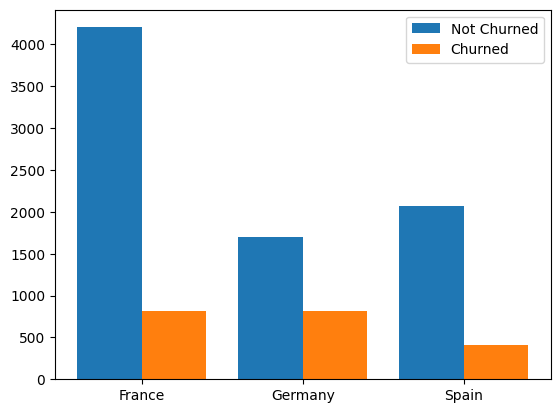

In [16]:
import numpy as np
x = np.arange(3)
plt.bar(x,churned_0,width=0.4,label='Not Churned')
plt.bar(x+0.4,churned_1,width=0.4,label='Churned')
plt.xticks(x+0.2,['France','Germany','Spain'])
plt.legend()
plt.show()

In [17]:
df4 = pd.get_dummies(df3,drop_first=True)
df4.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,0.538,0.324324,2,0.000000,1,1,1,0.506735,1,False,False,False
1,0.516,0.310811,1,0.334031,1,0,1,0.562709,0,False,True,False
2,0.304,0.324324,8,0.636357,3,1,0,0.569654,1,False,False,False
3,0.698,0.283784,1,0.000000,2,0,0,0.469120,0,False,False,False
4,1.000,0.337838,2,0.500246,1,1,1,0.395400,0,False,True,False


In [18]:
df4.shape

(10000, 12)

<h3> My data set is ready,<br>
    Let's start feeding the data to machine</h3>

In [19]:
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import classification_report,confusion_matrix

2024-07-18 10:52:13.713584: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-07-18 10:52:13.724946: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-07-18 10:52:13.809706: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-07-18 10:52:13.892461: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-18 10:52:13.978747: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been 

In [20]:
def ANN(X_train,X_test,y_train,y_test,loss='binary_crossentropy',weights=-1):
    model = keras.Sequential([
        keras.layers.Dense(11,input_dim = 11,activation='relu'),
        keras.layers.Dense(7,activation='relu'),
        keras.layers.Dense(1,activation='sigmoid')
    ])
    
    model.compile(optimizer='adam',loss=loss,metrics=['accuracy'])
    
    if weights==-1:
        model.fit(X_train,y_train,epochs=100)
    else:
        model.fit(X_train,y_train,epochs=100,weights=weights)
    
    print(model.evaluate(X_test,y_test))
    
    y_pred = model.predict(X_test)
    y_pred = np.round(y_pred)
    
    print("Classification Report is:")
    print(classification_report(y_test,y_pred))
    
    return y_pred

In [21]:
from sklearn.model_selection import train_test_split
X = df4.drop('Exited',axis=1)
y = df4.Exited

### spliting the data into train and test

```python

In [22]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=5,test_size=0.2)

In [23]:
y_pred = ANN(X_train,X_test,y_train,y_test)

/home/abir/miniconda3/envs/simple_env/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
I0000 00:00:1721278355.305844   19579 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-07-18 10:52:35.306299: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2343] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for

Epoch 1/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.4440 - loss: 0.8121
Epoch 2/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7987 - loss: 0.4764
Epoch 3/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8055 - loss: 0.4587
Epoch 4/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8127 - loss: 0.4449
Epoch 5/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8022 - loss: 0.4513
Epoch 6/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8115 - loss: 0.4346
Epoch 7/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8108 - loss: 0.4317
Epoch 8/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8152 - loss: 0.4284
Epoch 9/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8229 - loss: 0.4123
Epoch 10/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8275 - loss: 0.4050
Epoch 11/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8388 - loss: 0.3878
Epoch 12/100
250/250 ━━━━━━━━━━━━━━━━━━━━

<h3> Under sampling</h3>

In [29]:
df_exited = X_train[y_train==1]
df_not_exited = X_train[y_train==0]
no_df_exited = df_exited.shape[0]
no_df_not_exited = df_not_exited.shape[0]

y_exited = y_train[y_train == 1]
y_not_exited = y_train[y_train == 0]


df_exited.shape,df_not_exited.shape,no_df_exited,no_df_not_exited

((1632, 11), (6368, 11), 1632, 6368)

In [30]:
X_train_sampled = pd.concat([df_exited,df_not_exited.sample(no_df_exited)],axis=0)
y_train_sampled = pd.concat([y_exited, y_not_exited.sample(no_df_exited)], axis=0)

X_train_sampled.shape,y_train_sampled.shape

((3264, 11), (3264,))

In [31]:
# X_train,X_test,y_train,y_test = train_test_split(X.drop('Exited',axis=1),X.Exited,random_state=5,test_size=0.2)
y_preds = ANN(X_train_sampled,X_test,y_train_sampled,y_test)

Epoch 1/100


/home/abir/miniconda3/envs/simple_env/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


102/102 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.5344 - loss: 0.6956
Epoch 2/100
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6021 - loss: 0.6672
Epoch 3/100
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 992us/step - accuracy: 0.6078 - loss: 0.6584
Epoch 4/100
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 972us/step - accuracy: 0.6651 - loss: 0.6265
Epoch 5/100
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 964us/step - accuracy: 0.6709 - loss: 0.6215
Epoch 6/100
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 968us/step - accuracy: 0.6639 - loss: 0.6288
Epoch 7/100
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 982us/step - accuracy: 0.6581 - loss: 0.6203
Epoch 8/100
102/102 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6536 - loss: 0.6160
Epoch 9/100
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6822 - loss: 0.6046
Epoch 10/100
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6711 - loss: 0.6074
Epoch 11/100
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6779 - loss: 0.5981
Epoch 12/100
102/102 ━━━━━━━━━━━━━━━━━━━━ 0

<h3>method2: Oversampling</h3>

In [32]:
X_train_sampled = pd.concat([df_exited.sample(no_df_not_exited,replace=True,),df_not_exited],axis=0)
y_train_sampled = pd.concat([y_exited.sample(no_df_not_exited,replace=True), y_not_exited], axis=0)
X_train_sampled.shape,y_train_sampled.shape

((12736, 11), (12736,))

In [33]:
y_preds = ANN(X_train_sampled,X_test,y_train_sampled,y_test)

Epoch 1/100


/home/abir/miniconda3/envs/simple_env/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


398/398 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.5066 - loss: 0.7943
Epoch 2/100
398/398 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5286 - loss: 0.6920
Epoch 3/100
398/398 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.6361 - loss: 0.6608
Epoch 4/100
398/398 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6904 - loss: 0.6258
Epoch 5/100
398/398 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7038 - loss: 0.6002
Epoch 6/100
398/398 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7149 - loss: 0.5777
Epoch 7/100
398/398 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7196 - loss: 0.5640
Epoch 8/100
398/398 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7393 - loss: 0.5352
Epoch 9/100
398/398 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7436 - loss: 0.5278
Epoch 10/100
398/398 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7416 - loss: 0.5276
Epoch 11/100
398/398 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7455 - loss: 0.5201
Epoch 12/100
398/398 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step

<h3> method 3: smote</h3>

In [37]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy='minority')
X_train_sm,y_train_sm = smote.fit_resample(X_train, y_train)
y_train_sm.value_counts()

Exited
0    6368
1    6368
Name: count, dtype: int64

In [38]:
X_train,X_test,y_train,y_test = train_test_split(X_train_sm,y_train_sm,random_state=5,test_size=0.2)
y_preds = ANN(X_train,X_test,y_train,y_test)

/home/abir/miniconda3/envs/simple_env/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
319/319 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.5266 - loss: 0.7397
Epoch 2/100
319/319 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6585 - loss: 0.6241
Epoch 3/100
319/319 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.6869 - loss: 0.5903
Epoch 4/100
319/319 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.7103 - loss: 0.5684
Epoch 5/100
319/319 ━━━━━━━━━━━━━━━━━━━━ 25s 75ms/step - accuracy: 0.7170 - loss: 0.5540
Epoch 6/100
319/319 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.7372 - loss: 0.5358
Epoch 7/100
319/319 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7404 - loss: 0.5262
Epoch 8/100
319/319 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7500 - loss: 0.5157
Epoch 9/100
319/319 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7513 - loss: 0.5057
Epoch 10/100
319/319 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7477 - loss: 0.5087
Epoch 11/100
319/319 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7585 - loss: 0.4955
Epoch 12/100
319/319 ━━━━━━━━━━━━━━━━━━